In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

plt.style.use('seaborn-talk')

In [3]:
hydra_table = pd.read_csv("Fields-DR3/hydra_probgal0.7.csv", usecols=['RA', 'DEC', 'zml', 'r_petro'])

In [4]:
ra = hydra_table["RA"]
dec = hydra_table["DEC"]
zml = hydra_table["zml"]
r_petro = hydra_table["r_petro"]

In [5]:
#Defining the center of Hydra (in degress)
ra_0 = 159.17
dec_0 = -27.524

In [6]:
#Defining the radius of 1R200 around the center (in degrees)
#R200 = 1.4Mpc + scale of 0.247 Kpc/" ==> radius = 1.5744º
radius = 1.5744

In [7]:
def dist(ra, dec):
    return np.sqrt((ra - ra_0)**2 + (dec - dec_0)**2)

In [8]:
#Defining a mask for the objects inside 1R200
distances = dist(ra, dec)

mask1 = (distances < radius) & (zml > 0.0) & (zml < 0.1) & (r_petro < 18)
mask2 = (distances < radius) & (zml > 0.0) & (zml < 0.03) & (r_petro < 18)

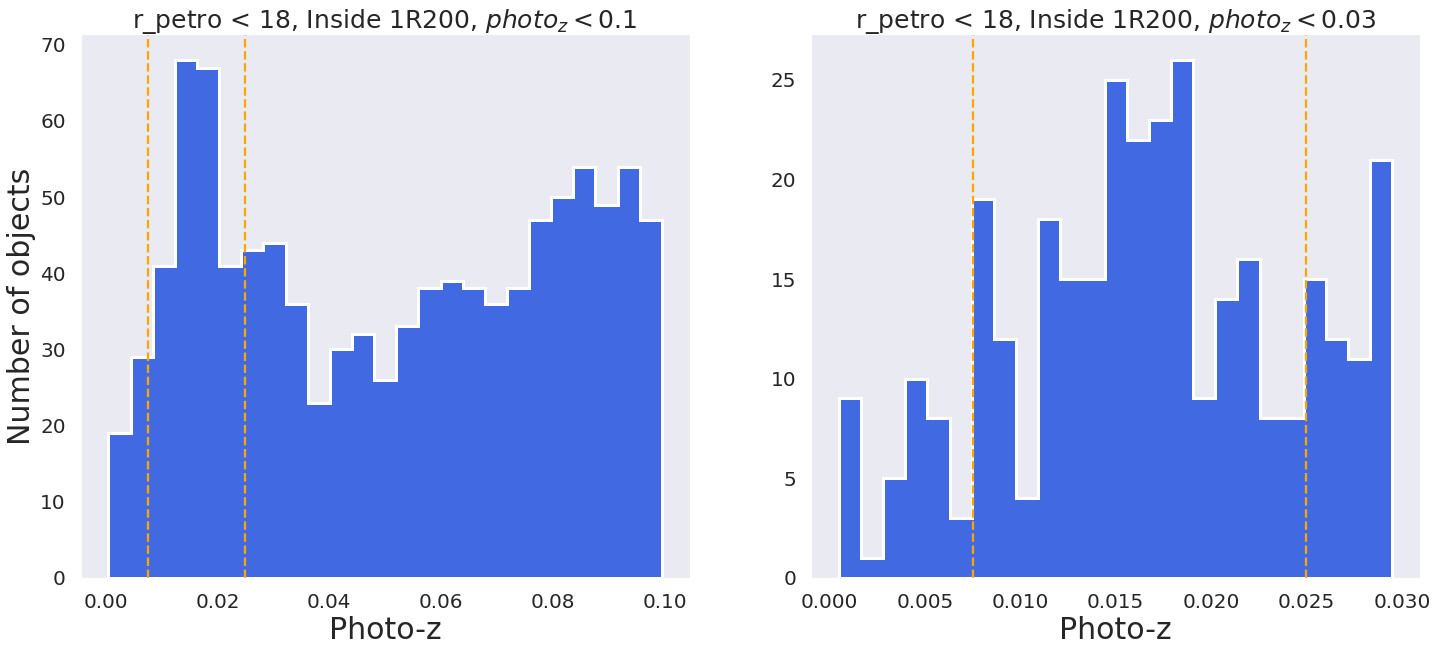

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(24, 10))

axs[0].hist(zml[mask1], bins=25, color='royalblue', histtype='stepfilled',linewidth=3.0)
axs[0].set_title(r"r_petro < 18, Inside 1R200, $photo_z < 0.1$", fontsize=25)
axs[0].set_ylabel("Number of objects", fontsize=30)

axs[1].hist(zml[mask2], bins=25, color='royalblue', histtype='stepfilled',linewidth=3.0)
axs[1].set_title(r"r_petro < 18, Inside 1R200, $photo_z < 0.03$", fontsize=25)

for i in range(2):
    axs[i].set_xlabel("Photo-z", fontsize=30)
    axs[i].yaxis.set_tick_params(labelsize=20, width=3)
    axs[i].xaxis.set_tick_params(labelsize=20, width=3)
    axs[i].grid()
    axs[i].axvline(x=0.0075, linestyle='--', color='orange')
    axs[i].axvline(x=0.025, linestyle='--', color='orange')

plt.show()